In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import seaborn as sns

In [2]:
output_data_file = "Output/student-merge.csv"
por_path = "Resources/student-por.csv"
math_path = "Resources/student-mat.csv"

por_df = pd.read_csv(por_path)
math_df = pd.read_csv(math_path)

In [3]:
students_df = pd.merge(por_df, math_df, on=["school","sex","age","address","famsize",
                                            "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                                            "guardian", "traveltime","nursery","higher",
                                            "internet","romantic","famrel","freetime",
                                            "goout","Dalc","Walc","health"])
students_df.columns = students_df.columns.str.replace("_x","_por")
students_df.columns = students_df.columns.str.replace("_y","_math")
students_df.to_csv(output_data_file)
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,absences_math,G1_math,G2_math,G3_math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2,0,yes,no,no,no,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,0,no,yes,no,no,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,yes,no,yes,no,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,0,no,yes,yes,yes,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,0,no,yes,yes,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,...,3,1,no,no,no,yes,0,7,5,0
366,MS,F,18,U,LE3,T,3,1,teacher,services,...,2,0,no,yes,yes,no,0,7,9,8
367,MS,F,18,U,GT3,T,1,1,other,other,...,2,1,no,no,no,yes,0,6,5,0
368,MS,M,17,U,LE3,T,3,1,services,services,...,1,0,no,no,no,no,3,14,16,16


F    195
M    175
Name: sex, dtype: int64


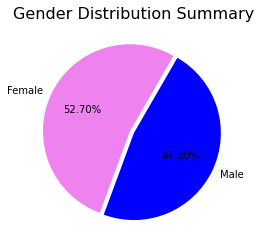

In [4]:
# Generate a pie plot showing the distribution of female versus male using Pandas
gender_count=students_df["sex"].value_counts()
print(gender_count)
colour_plot=["violet","blue"]
explode_plot=(0.05,0)
plt.pie(gender_count,labels=['Female','Male'],autopct='%0.2f%%',colors=colour_plot,explode=explode_plot,startangle=60)
plt.title("Gender Distribution Summary",fontsize=16)
plt.savefig('output/Fig1.png')
plt.show()


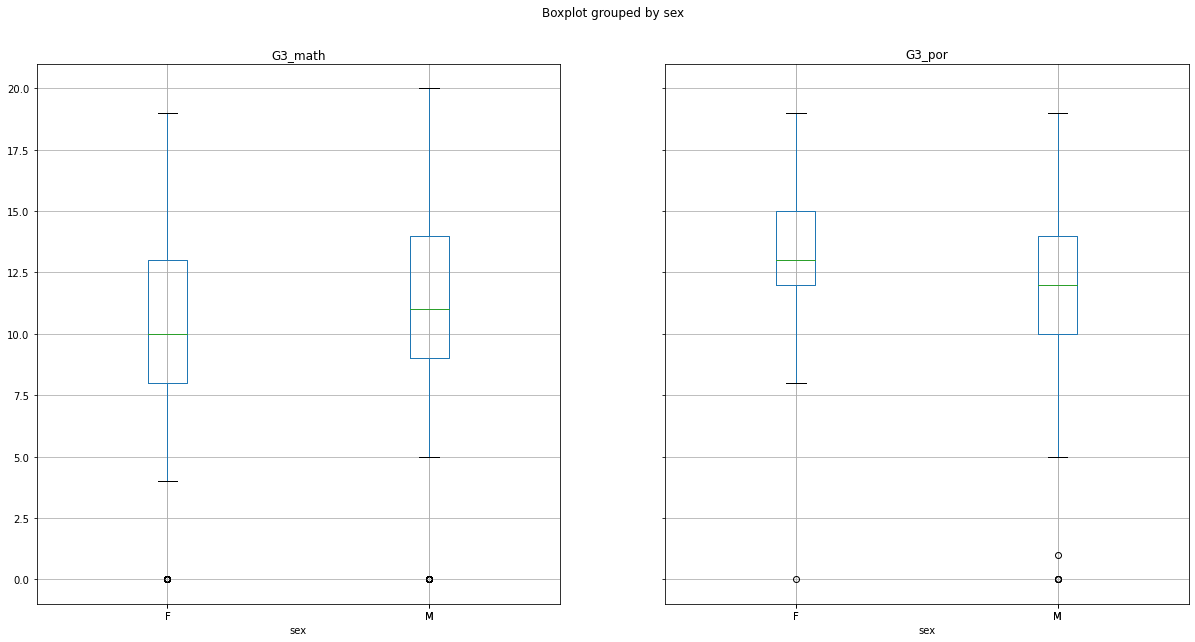

In [5]:
students_df.boxplot(["G3_math","G3_por"], by="sex", figsize=(20, 10))
plt.savefig('output/Fig2.png')

In [6]:
age_count=students_df["age"].value_counts()
student_age=students_df["age"].unique()

In [7]:
student_age_mean=students_df["age"].mean()
student_age_median=students_df["age"].median()

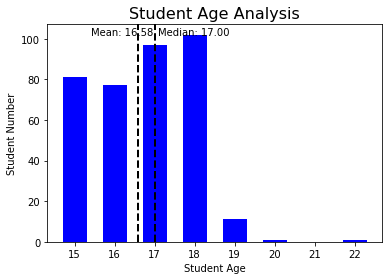

In [8]:
#Generate bar chart showing distribution of age in the dataset
fig=plt.bar(student_age,age_count,color='b',align="center", width= 0.6)
plt.title("Student Age Analysis",fontsize=16)
plt.xlabel("Student Age")
plt.ylabel("Student Number")
plt.rcParams['figure.figsize'] = [8, 6]
plt.axvline(student_age_mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(student_age_median, color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(student_age_mean*0.93, max_ylim*0.95, 'Mean: {:.2f}'.format(student_age_mean))
plt.text(student_age_mean*1.03, max_ylim*0.95, 'Median: {:.2f}'.format(student_age_median))
plt.savefig('output/Fig3.png')
plt.show()

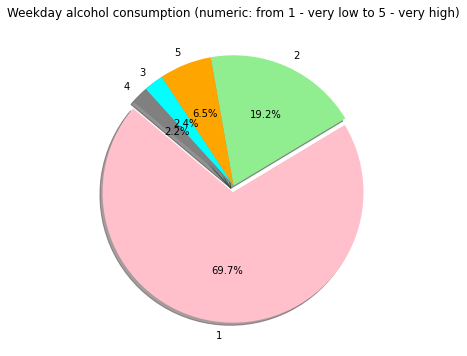

In [9]:
#Generate pie chart showing the weekday alcohol consumption habits in this dataset
labels = students_df["Dalc"].unique()
amount = students_df["Dalc"].value_counts()

colours = ["pink","lightgreen","orange","cyan","gray"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekday alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.savefig('output/Fig4.png')
plt.show()

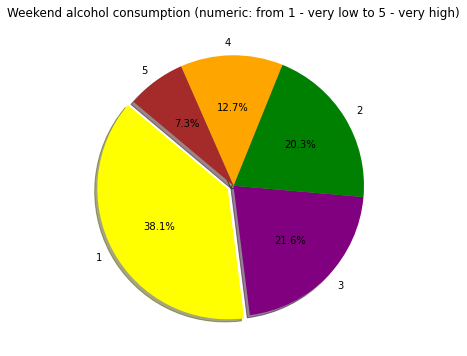

In [10]:
#Generate pie chart showing weekend alcohol consumption habits in this dataset
labels = students_df["Walc"].unique()
amount = students_df["Walc"].value_counts()

colours = ["yellow","purple","green","orange","brown"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.savefig('output/Fig5.png')
plt.show()

In [11]:
x1 = students_df.loc[students_df["paid_math"]=="yes","paid_math"].count()
x2 = students_df.loc[students_df["paid_por"]=="yes","paid_por"].count()
x3 = students_df.loc[students_df["paid_math"]=="no","paid_math"].count()
x4 = students_df.loc[students_df["paid_por"]=="no","paid_por"].count()

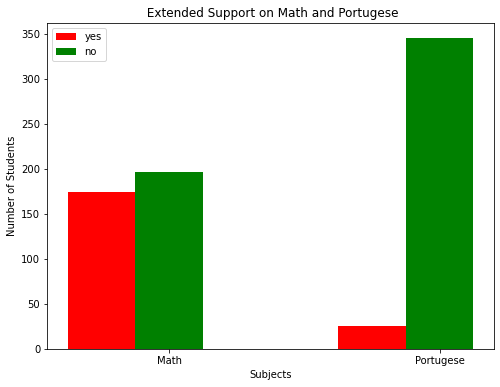

In [12]:
N = 2
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, [x1,x2], width, color = 'r', label= 'yes')

bar2 = plt.bar(ind+width, [x3,x4], width, color='g', label='no')

plt.xlabel("Subjects")
plt.ylabel('Number of Students')
plt.title(" Extended Support on Math and Portugese")
  
plt.xticks(ind+width,['Math', 'Portugese'])
plt.legend( (bar1, bar2), ('yes', 'no'))
plt.savefig('output/Fig6.png')
plt.show()

In [13]:
#Weekly study time vs Portuguese final grades
studyhours = [1,2,3,4]

#Create empty list to fill with final grades
por_data = []
math_data = []

for studies in studyhours:
    #Locate the rows which contains the weekly study time for Portuguese and get the final grade
    study_por = students_df.loc[students_df['studytime_por'] == studies, 'G3_por']
    study_math = students_df.loc[students_df['studytime_math'] == studies, 'G3_math']
    
    #Add subset
    por_data.append(study_por)
    math_data.append(study_math)

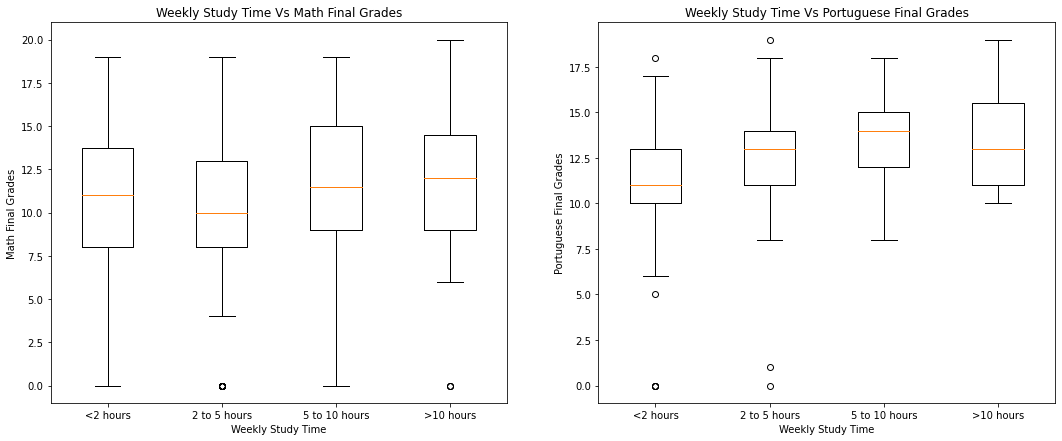

In [14]:
f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)
ax.boxplot(math_data, labels=studyhours)
ax.set_title('Weekly Study Time Vs Math Final Grades')
ax.set_ylabel('Math Final Grades')
ax.set_xlabel('Weekly Study Time')
plt.xticks([1,2,3,4],['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])

ax = f.add_subplot(122)
ax.boxplot(por_data, labels=studyhours)
ax.set_title('Weekly Study Time Vs Portuguese Final Grades')
ax.set_ylabel('Portuguese Final Grades')
ax.set_xlabel('Weekly Study Time')
plt.xticks([1,2,3,4],['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])
plt.savefig('output/Fig7.png')
plt.show()

In [15]:
for num_sm, a in students_df.groupby('studytime_math'):
    globals()['studym' + str(num_sm)] = a

#Stats showing correlation between weekly study time and final math grades
print(f"Statistical significance between weekly study time and final math grades:")
stats.f_oneway(studym1["G3_math"], studym2["G3_math"], studym3["G3_math"], studym4["G3_math"])

Statistical significance between weekly study time and final math grades:


F_onewayResult(statistic=1.2268262651371196, pvalue=0.299728941279215)

In [16]:
for num_sp, b in students_df.groupby('studytime_por'):
    globals()['studyp' + str(num_sp)] = b

#Stats showing correlation between weekly study time and final Portuguese grades
print(f"Statistical significance between weekly study time and final Portuguese grades:")
stats.f_oneway(studyp1["G3_por"], studyp2["G3_por"], studyp3["G3_por"], studyp4["G3_por"])

Statistical significance between weekly study time and final Portuguese grades:


F_onewayResult(statistic=12.211856898115895, pvalue=1.2402988062865567e-07)

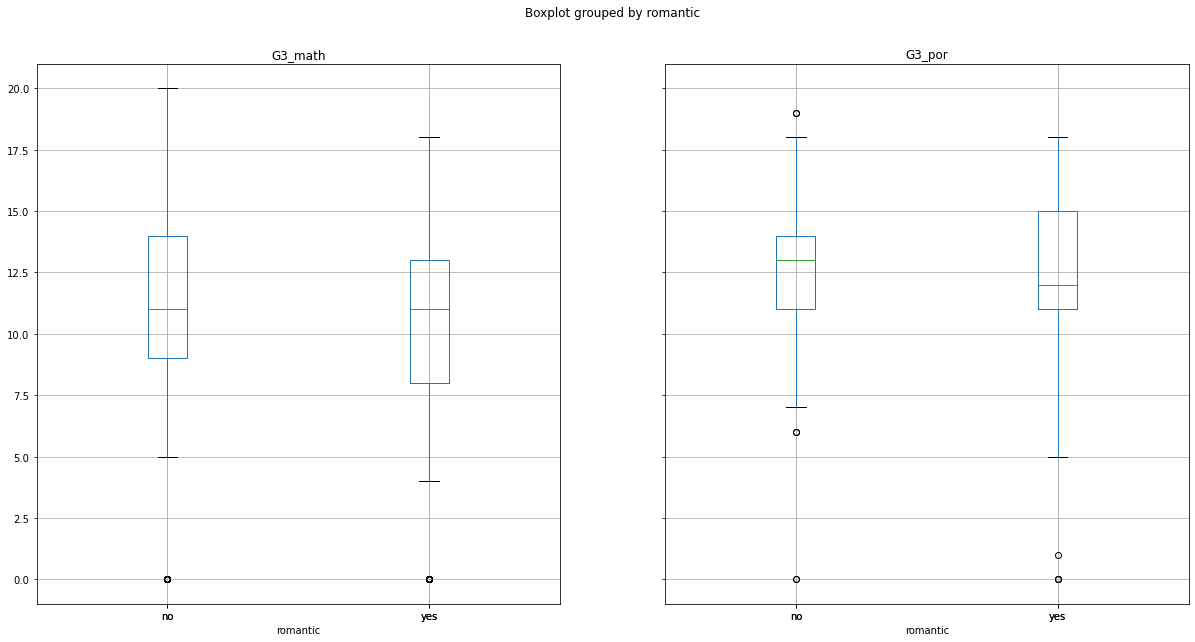

In [17]:
students_df.boxplot(["G3_math","G3_por"], by="romantic", figsize=(20, 10))
plt.savefig('output/Fig8.png')

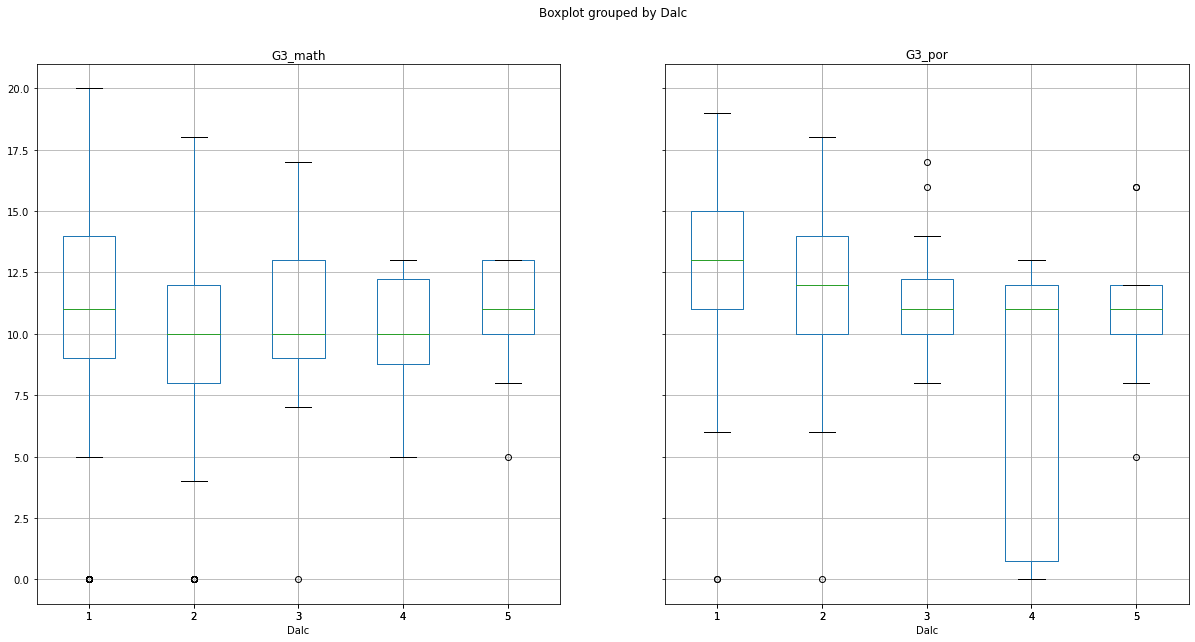

In [18]:
students_df.boxplot(["G3_math","G3_por"], by="Dalc", figsize=(20, 10))
plt.savefig('output/Fig9.png')

In [19]:
for num_d, c in students_df.groupby('Dalc'):
    globals()['group' + str(num_d)] = c

#Stats showing correlation between weekday alcohol consumption and final math grades
print(f"Statistical significance between weekday alcohol consumption habits and final math grades:")
stats.f_oneway(group1["G3_math"], group2["G3_math"], group3["G3_math"], group4["G3_math"], group5["G3_math"])

Statistical significance between weekday alcohol consumption habits and final math grades:


F_onewayResult(statistic=1.113585395009432, pvalue=0.3497837813433307)

In [20]:
#Stats showing correlation between weekday alcohol consumption and final Portuguese grades
print(f"Statistical significance between weekday alcohol consumption habits and final Portuguese grades:")
stats.f_oneway(group1["G3_por"], group2["G3_por"], group3["G3_por"], group4["G3_por"], group5["G3_por"])

Statistical significance between weekday alcohol consumption habits and final Portuguese grades:


F_onewayResult(statistic=10.777988979046963, pvalue=2.872537539647647e-08)

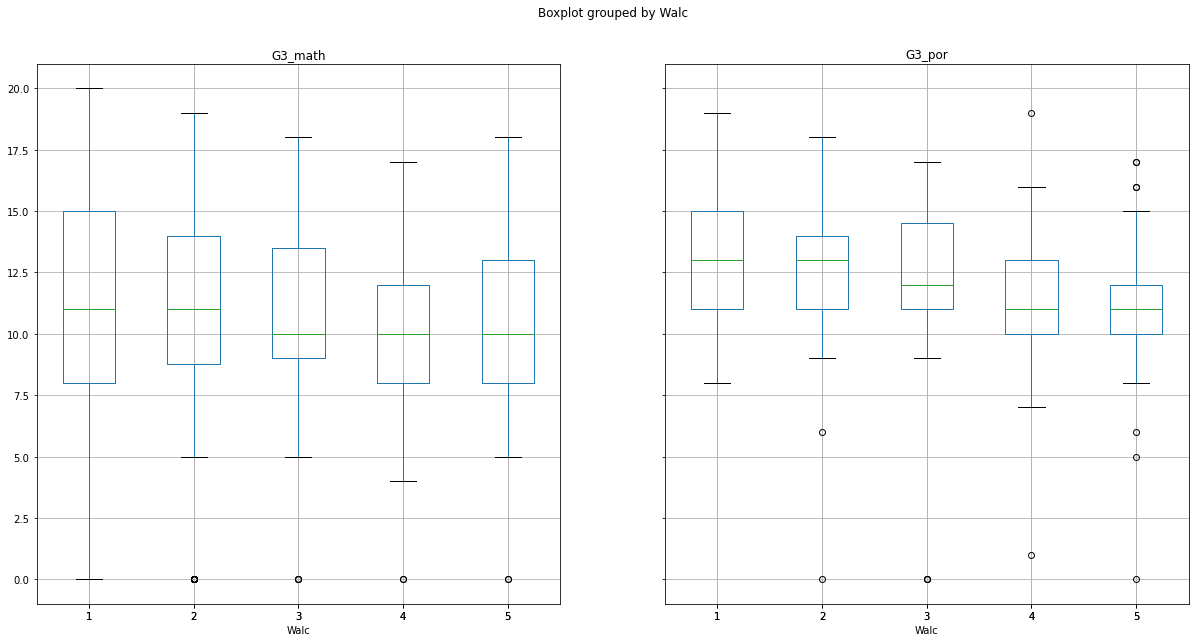

In [21]:
students_df.boxplot(["G3_math","G3_por"], by="Walc", figsize=(20, 10))
plt.savefig('output/Fig10.png')

In [22]:
for num_w, d in students_df.groupby('Walc'):
    globals()['groupw' + str(num_w)] = d

#Stats showing correlation between weekend alcohol consumption and final math grades
print(f"Statistical significance between weekend alcohol consumption habits and final math grades:")
stats.f_oneway(groupw1["G3_math"], groupw2["G3_math"], groupw3["G3_math"], groupw4["G3_math"], groupw5["G3_math"])

Statistical significance between weekend alcohol consumption habits and final math grades:


F_onewayResult(statistic=0.40021419738346875, pvalue=0.808482036488183)

In [23]:
#Stats showing correlation between weekend alcohol consumption and final math grades
print(f"Statistical significance between weekend alcohol consumption habits and final Portuguese grades:")
stats.f_oneway(groupw1["G3_por"], groupw2["G3_por"], groupw3["G3_por"], groupw4["G3_por"], groupw5["G3_por"])

Statistical significance between weekend alcohol consumption habits and final Portuguese grades:


F_onewayResult(statistic=5.68330528990033, pvalue=0.00019026774756571534)

Math: y = 0.03x + 5.04
Portugese: y = -0.2x + 6.1


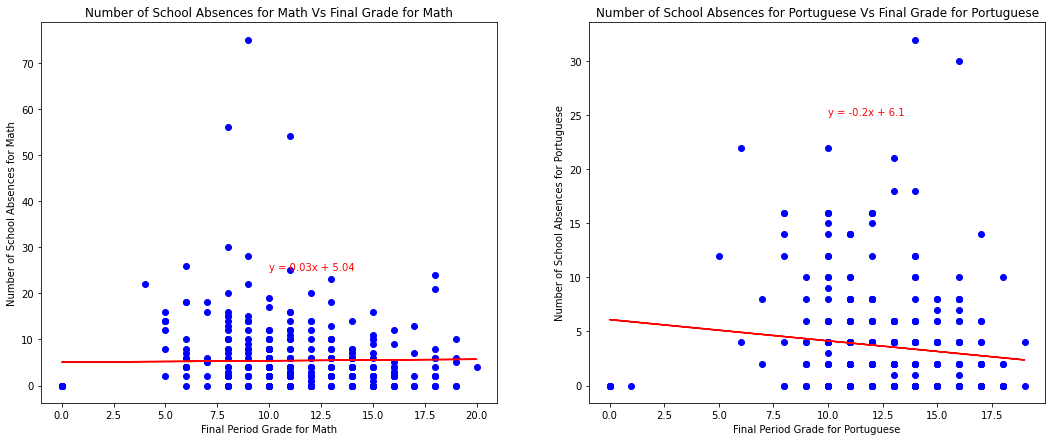

In [24]:
f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)
xm_values = students_df['G3_math']
ym_values = students_df['absences_math']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xm_values, ym_values)
regressm_values = xm_values * slope + intercept
linem_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Math: {linem_eq}")

ax.scatter(xm_values,ym_values, color='b')
ax.plot(xm_values,regressm_values,'r-')
ax.set_title('Number of School Absences for Math Vs Final Grade for Math')
ax.set_xlabel('Final Period Grade for Math')
ax.set_ylabel('Number of School Absences for Math')
ax.annotate(linem_eq, (10,25),color='r')

# Identify the relationship of Student Absences for Math and Final Math Grade
ax = f.add_subplot(122)
x_values = students_df['G3_por']
y_values = students_df['absences_por']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linep_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Portugese: {linep_eq}")

ax.scatter(x_values,y_values, color='b')
ax.plot(x_values,regress_values,'r-')
ax.set_title('Number of School Absences for Portuguese Vs Final Grade for Portuguese')
ax.set_xlabel('Final Period Grade for Portuguese')
ax.set_ylabel('Number of School Absences for Portuguese')
ax.annotate(linep_eq, (10,25),color='r')

plt.savefig('output/Fig11.png')
plt.show()

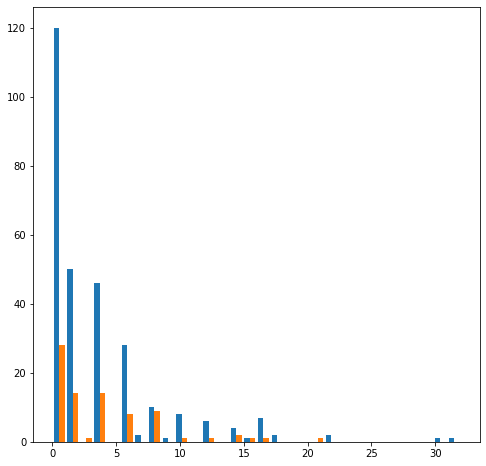

In [25]:
#Distribution of absences for students who live in city vs rural
fig3 = plt.figure(figsize=(8,8))
ax3  = fig3.add_subplot(111)
urban = students_df[students_df["address"] == 'U']
absences_urban = urban["absences_por"]
rural = students_df[students_df["address"] == 'R']
absences_rural = rural["absences_por"]
plt.hist([absences_urban, absences_rural], bins=30, label=['Urban','Absences'])
plt.show()

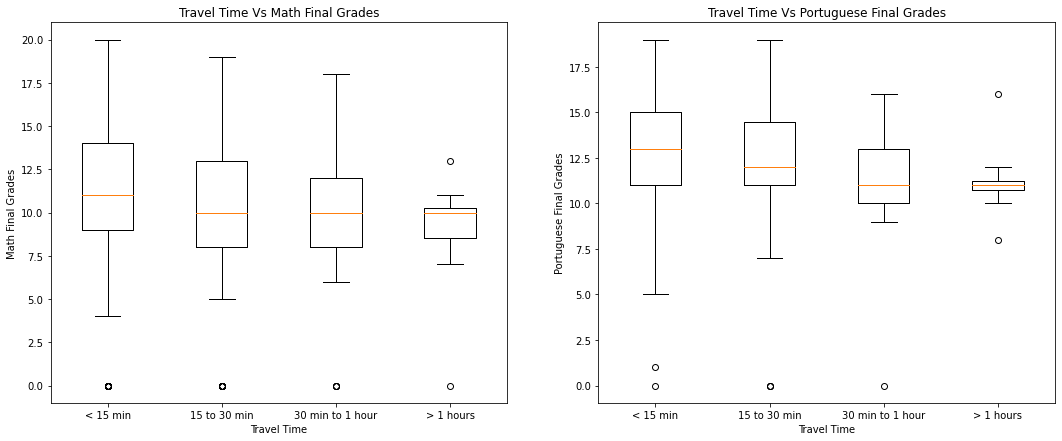

In [26]:
# Travel Time Vs portuguese Final Grades
travel = [1, 2, 3, 4]
# Create empty list to fill with G3 Grades
travelpor_data = []
travelmath_data= []

for travels in travel:
# Locate the rows which contain weekly study time on Portuguese and get the final Grade
    tra_por = students_df.loc[students_df['traveltime'] == travels,'G3_por']
    tra_math = students_df.loc[students_df['traveltime'] == travels,'G3_math']
    # add subset
    travelpor_data.append(tra_por)
    travelmath_data.append(tra_math)


f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)
ax.boxplot(travelmath_data, labels=travel)
ax.set_title('Travel Time Vs Math Final Grades')
ax.set_ylabel('Math Final Grades')
ax.set_xlabel('Travel Time')
plt.xticks([1,2,3,4],['< 15 min', '15 to 30 min', '30 min to 1 hour', '> 1 hours'])

ax = f.add_subplot(122)
ax.boxplot(travelpor_data, labels=travel)
ax.set_title('Travel Time Vs Portuguese Final Grades')
ax.set_ylabel('Portuguese Final Grades')
ax.set_xlabel('Travel Time')
plt.xticks([1,2,3,4],['< 15 min', '15 to 30 min', '30 min to 1 hour', '> 1 hours'])
plt.savefig('output/Fig12.png')

plt.show()

In [27]:
schoolsup_por = students_df.groupby(['schoolsup_por'])
famsup_por = students_df.groupby(['famsup_por'])
paid_por = students_df.groupby(['paid_por'])
act_por = students_df.groupby(['activities_por'])
schoolsup_math = students_df.groupby(['schoolsup_math'])
famsup_math = students_df.groupby(['famsup_math'])
paid_math = students_df.groupby(['paid_math'])
act_math = students_df.groupby(['activities_math'])
ave_schoolsup_por = schoolsup_por["G3_por"].mean()

ave_famsup_por = famsup_por["G3_por"].mean()
ave_paid_por = paid_por["G3_por"].mean()
ave_act_por = act_por["G3_por"].mean()
ave_schoolsup_math = schoolsup_math["G3_math"].mean()
ave_famsup_math = famsup_math["G3_math"].mean()
ave_paid_math = paid_math["G3_math"].mean()
ave_act_math = act_math["G3_math"].mean()

averagemath_df = pd.DataFrame({'Extra Educational Support':ave_schoolsup_math,
                              'Family Educational Support':ave_famsup_math,
                              'Extra Paid Classes':ave_paid_math,
                              'Extra-curricular Activities':ave_act_math})
averagemath_df.style.set_caption("Factors that Affect the Final Grade Average for Math Subject")

,Extra Educational Support,Family Educational Support,Extra Paid Classes,Extra-curricular Activities
no,10.616822,10.762590,10.071429,10.296089
yes,9.469388,10.285714,10.908046,10.623037


In [28]:
averagepor_df = pd.DataFrame({'Extra Educational Support':ave_schoolsup_por,
                              'Family Educational Support':ave_famsup_por,
                              'Extra Paid Classes':ave_paid_por,
                              'Extra-curricular Activities':ave_act_por})
averagepor_df.style.set_caption("Factors that Affect the Final Grade Average for Portugese Subject")


,Extra Educational Support,Family Educational Support,Extra Paid Classes,Extra-curricular Activities
no,12.716511,12.194245,12.660870,12.206704
yes,11.489796,12.770563,11.080000,12.879581


Math: y = -0.3x + 4.8
Portugese: y = 0.12x + 12.06


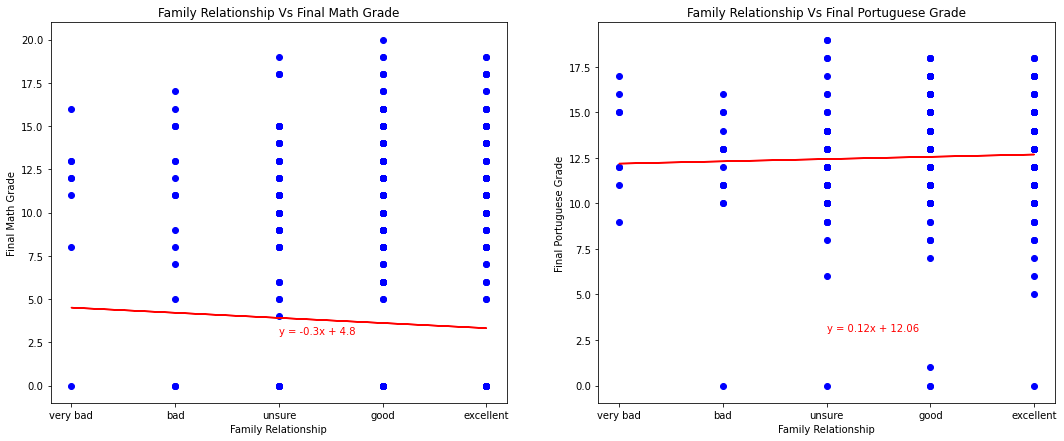

In [29]:
# Identify the family relationship with Final grade for math
f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)

xm_values = students_df['famrel']
ym_values = students_df['G3_math']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xm_values, y_values)
regressm_values = xm_values * slope + intercept
linem_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Math: {linem_eq}")

ax.scatter(xm_values,ym_values, color='b')
ax.plot(xm_values,regressm_values,'r-')
ax.set_title('Family Relationship Vs Final Math Grade')
ax.set_xlabel('Family Relationship')
plt.xticks([1,2,3,4,5],['very bad', 'bad', 'unsure', 'good','excellent'])
ax.set_ylabel('Final Math Grade')
ax.annotate(linem_eq, (3,3),color='r')

# Identify the family relationship with Final grade for portuguese
ax = f.add_subplot(122)
x_values = students_df['famrel']
y_values = students_df['G3_por']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linep_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Portugese: {linep_eq}")

ax.scatter(x_values,y_values, color='b')
ax.plot(x_values,regress_values,'r-')
ax.set_title('Family Relationship Vs Final Portuguese Grade')
ax.set_xlabel('Family Relationship')
plt.xticks([1,2,3,4,5],['very bad', 'bad', 'unsure', 'good','excellent'])
ax.set_ylabel('Final Portuguese Grade')
ax.annotate(linep_eq, (3,3),color='r')

plt.savefig('output/Fig13.png')
plt.show()

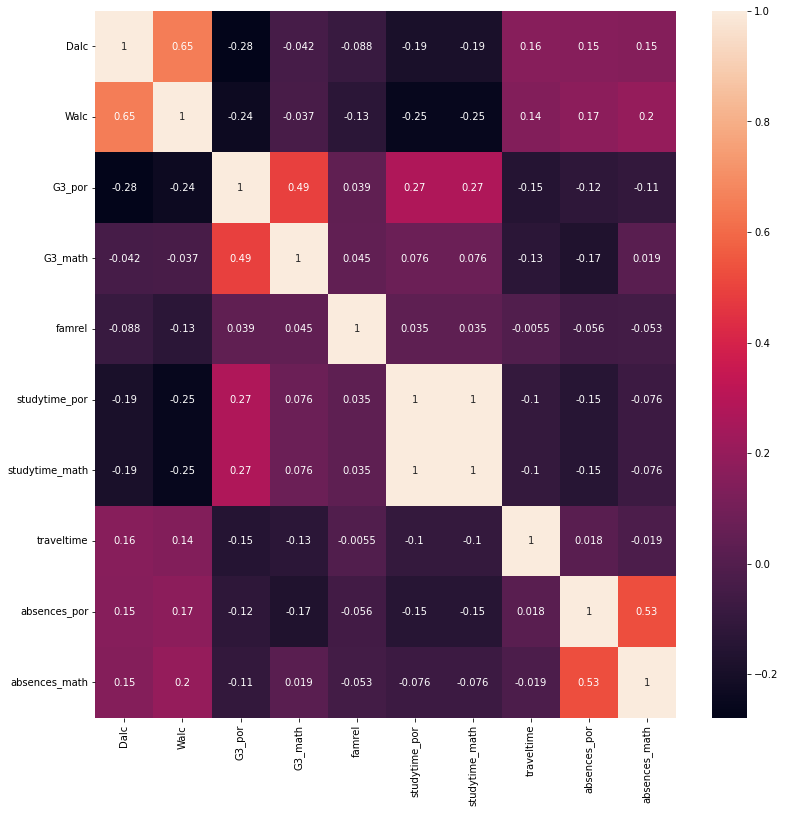

In [30]:
analysis_cols = students_df[['Dalc','Walc','G3_por','G3_math','famrel','romantic',
                            'sex','internet','studytime_por','studytime_math','traveltime',
                            'paid_por','paid_math','schoolsup_por','schoolsup_math',
                            'famsup_por','famsup_math','absences_por','absences_math']]
plt.figure(figsize=(13,13))
sns.heatmap(analysis_cols.corr(), annot=True)
plt.savefig('output/Fig14.png')

In [ ]:
age_count=students_df["age"].value_counts()

student_age=students_df["age"].unique()

In [63]:
student_age_mean=students_df["age"].mean()
student_age_median=students_df["age"].median()

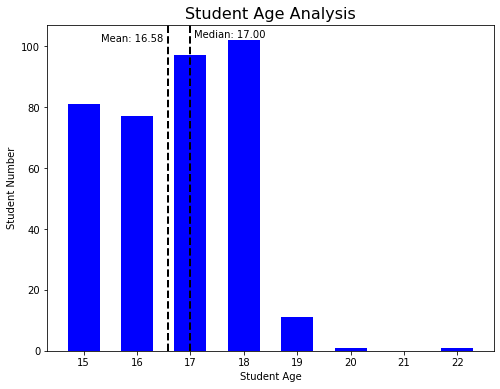

In [64]:

fig=plt.bar(student_age,age_count,color='b',align="center", width= 0.6)
plt.title("Student Age Analysis",fontsize=16)
plt.xlabel("Student Age")
plt.ylabel("Student Number")
plt.rcParams['figure.figsize'] = [8, 6]
plt.axvline(student_age_mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(student_age_median, color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(student_age_mean*0.925, max_ylim*0.95, 'Mean: {:.2f}'.format(student_age_mean))

plt.text(student_age_mean*1.03, max_ylim*0.96, 'Median: {:.2f}'.format(student_age_median))
plt.show()

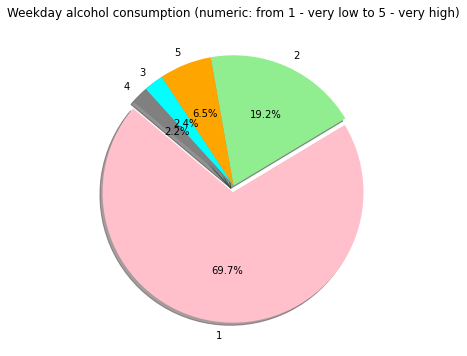

In [65]:
labels = students_df["Dalc"].unique()
amount = students_df["Dalc"].value_counts()

colours = ["pink","lightgreen","orange","cyan","gray"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekday alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()





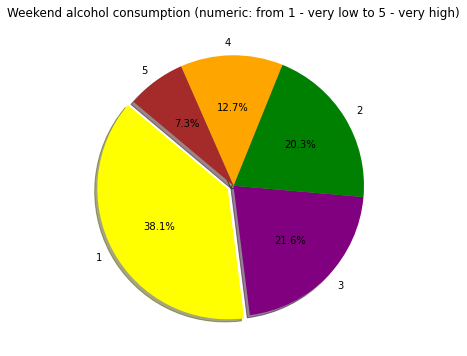

In [66]:
labels = students_df["Walc"].unique()
amount = students_df["Walc"].value_counts()

colours = ["yellow","purple","green","orange","brown"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()



In [67]:
x1 = students_df.loc[students_df["paid_math"]=="yes","paid_math"].count()
x2 = students_df.loc[students_df["paid_por"]=="yes","paid_por"].count()
x3 = students_df.loc[students_df["paid_math"]=="no","paid_math"].count()
x4 = students_df.loc[students_df["paid_por"]=="no","paid_por"].count()


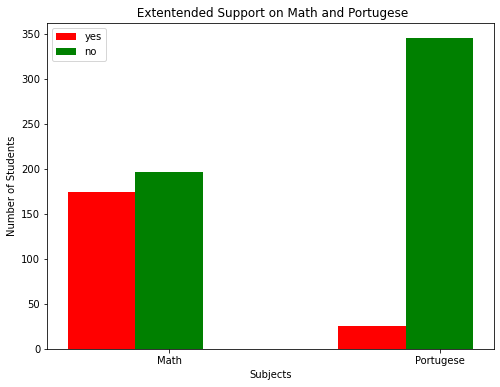

In [68]:


N = 2
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, [x1,x2], width, color = 'r', label= 'yes')
  

bar2 = plt.bar(ind+width, [x3,x4], width, color='g', label='no')
  

  
plt.xlabel("Subjects")
plt.ylabel('Number of Students')
plt.title(" Extentended Support on Math and Portugese")
  
plt.xticks(ind+width,['Math', 'Portugese'])
plt.legend( (bar1, bar2), ('yes', 'no') )
plt.show()

array([<AxesSubplot:title={'center':'G3_math'}, xlabel='romantic'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='romantic'>],
      dtype=object)

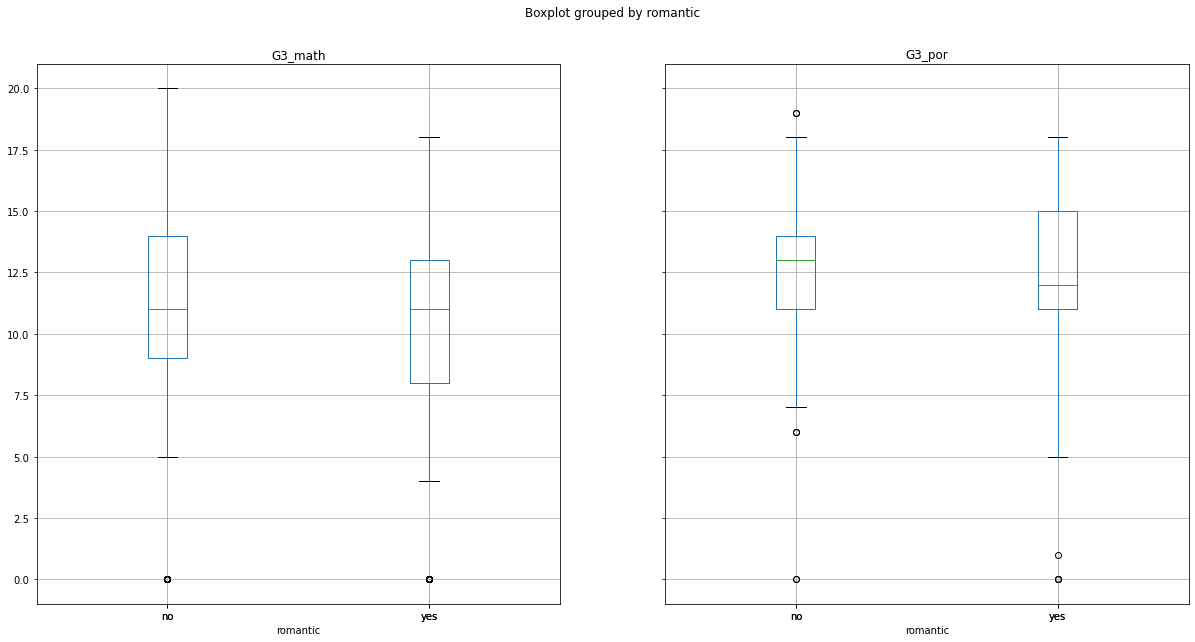

In [69]:

students_df.boxplot(["G3_math","G3_por"], by="romantic", figsize=(20, 10))

array([<AxesSubplot:title={'center':'G3_math'}, xlabel='Dalc'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='Dalc'>],
      dtype=object)

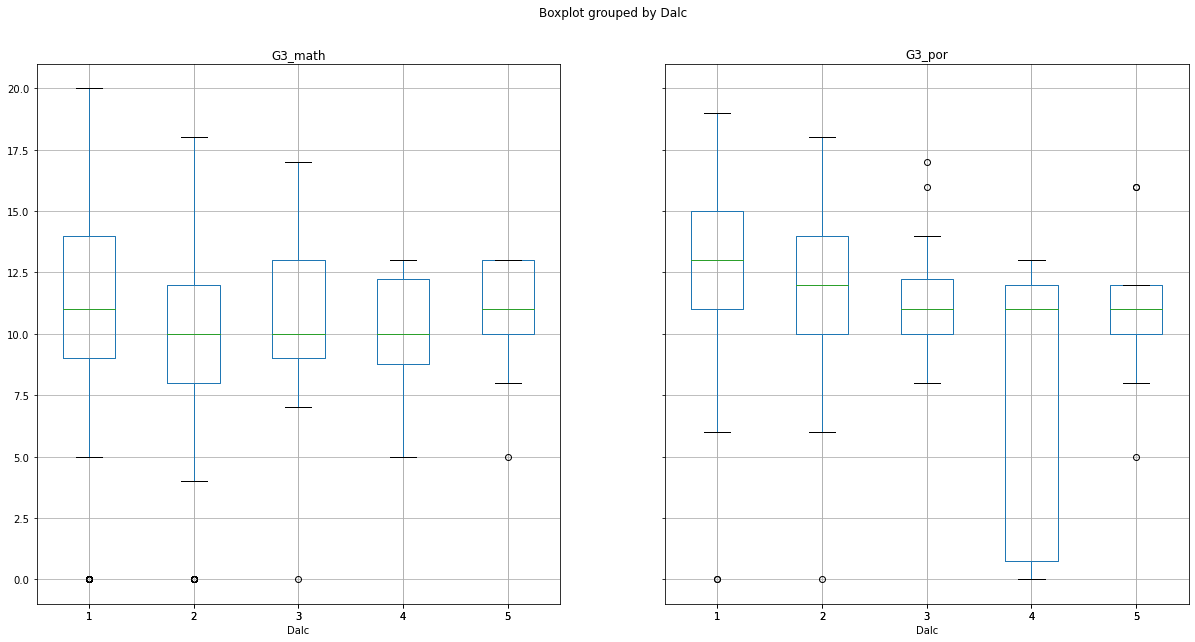

In [71]:
students_df.boxplot(["G3_math","G3_por"], by="Dalc", figsize=(20, 10))


In [72]:
group1 = students_df[students_df["Dalc"] == 1]["G3_math"]
group2 = students_df[students_df["Dalc"] == 2]["G3_math"]
group3 = students_df[students_df["Dalc"] == 3]["G3_math"]
group4 = students_df[students_df["Dalc"] == 4]["G3_math"]
group5 = students_df[students_df["Dalc"] == 5]["G3_math"]

In [73]:
stats.f_oneway(group1, group2, group3, group4,group5)

F_onewayResult(statistic=1.113585395009432, pvalue=0.3497837813433307)

array([<AxesSubplot:title={'center':'G3_math'}, xlabel='Walc'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='Walc'>],
      dtype=object)

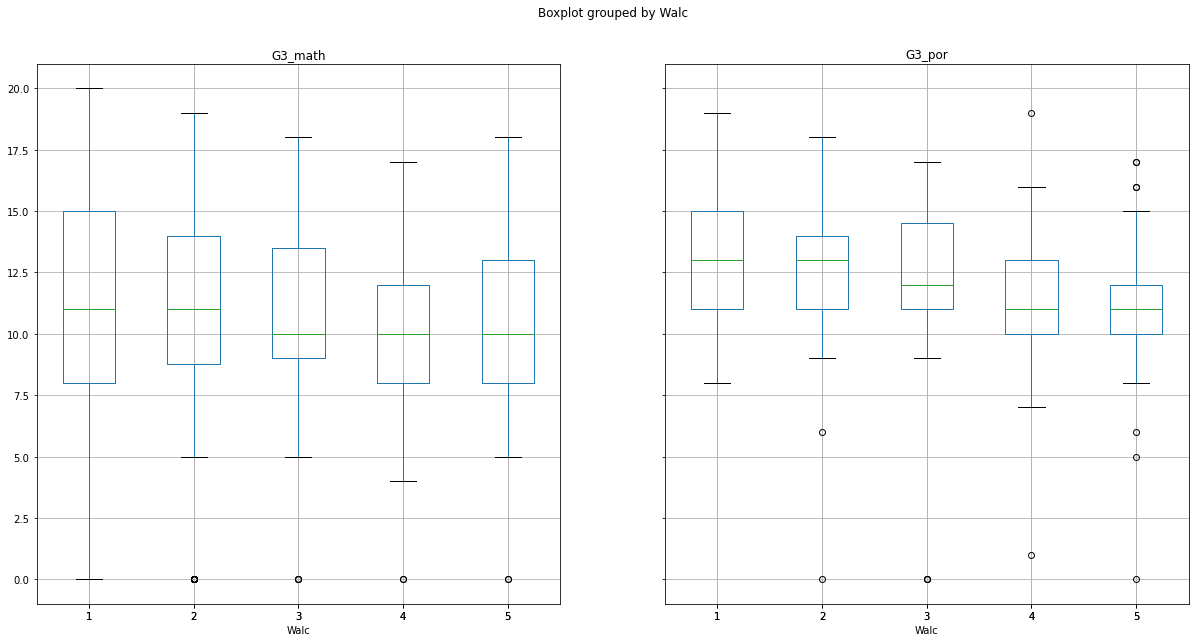

In [74]:
students_df.boxplot(["G3_math","G3_por"], by="Walc", figsize=(20, 10))

In [75]:
group1 = students_df[students_df["Walc"] == 1]["G3_math"]
group2 = students_df[students_df["Walc"] == 2]["G3_math"]
group3 = students_df[students_df["Walc"] == 3]["G3_math"]
group4 = students_df[students_df["Walc"] == 4]["G3_math"]
group5 = students_df[students_df["Walc"] == 5]["G3_math"]

In [76]:
stats.f_oneway(group1, group2, group3, group4,group5)

F_onewayResult(statistic=0.40021419738346875, pvalue=0.808482036488183)